In [582]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# INES vs. Kraken: Comparative Analysis of Distributed Query Optimization Algorithms

## Executive Summary

This notebook presents a comprehensive comparative analysis of two distributed query optimization algorithms: **INES** and **Kraken**. Both algorithms are designed for Complex Event Processing (CEP) in distributed network environments, with the goal of minimizing transmission costs while maintaining acceptable computational performance.

### Key Findings Preview:
- **Cost Optimization**: Kraken consistently outperforms INES in transmission cost reduction
- **Computational Efficiency**: INES demonstrates superior computational speed
- **Trade-offs**: Clear performance trade-offs between cost optimization and computational efficiency

---

## Table of Contents

1. [Dataset Overview & Methodology](#dataset-overview)
2. [Hypothesis 1: Cost Optimization Performance](#hypothesis-1)
3. [Hypothesis 2: Computing Time Efficiency](#hypothesis-2)
4. [Statistical Analysis](#statistical-analysis)
5. [Conclusions & Recommendations](#conclusions)

---

In [583]:
# Load the data
path = '/Users/finn/Projects/INES/src/kraken/result'
data_ines = pd.read_csv(path + '/ines_results.csv')
data_kraken = pd.read_csv(path + '/kraken_results.csv')

In [584]:
# Read INES data
data_ines.head()

,ID,TransmissionRatio,Transmission,INEvTransmission,FilterUsed,Nodes,EventSkew,EventNodeRatio,WorkloadSize,NumberProjections,...,centralHopLatency,Depth,CentralTransmission,LowerBound,EventTypes,MaximumParents,exact_costs,PushPullTime,MaxPushPullLatency,endTransmissionRatio
0,3842078,0.801704,59958.0,48068.571821,[],10,2.0,0.5,5,42,...,3,3.0,59958.0,0.0,6,0,18402.112995,0.021941,0,1.038260
1,4308213,0.666804,79932.0,53299.000000,[],10,2.0,0.5,5,75,...,3,3.0,79932.0,0.0,6,0,35575.381688,0.075563,0,2.338639
2,4635544,0.690634,35502.0,24518.887842,[],10,2.0,0.5,5,92,...,3,2.0,35502.0,0.0,6,0,15289.013446,0.040175,0,1.207568
3,4249688,0.654482,84318.0,55184.614378,[],10,2.0,0.5,5,106,...,3,2.0,84318.0,0.0,6,0,28582.753363,0.062531,0,1.136672
4,5669125,1.270502,66432.0,84402.000000,[],10,2.0,0.5,5,116,...,3,1.0,66432.0,0.0,6,0,42362.065911,0.019876,0,2.085158


In [585]:
# Read Kraken data
data_kraken.head()

,kraken_simulation_id,INES_ID,timestamp,execution_time_seconds,total_projections_placed,central_placement_cost,integrated_placement_cost,central_latency,integrated_placement_latency,cost_reduction_ratio,...,nodes_with_placements,placement_difference_to_ines_count,network_size,node_event_ratio,num_event_types,event_skew,max_parents,query_size,query_length,simulation_mode
0,6871007,3842078,1.756645e+09,0.1177,15,59958.0,6117.848614,3,15.0,0.102036,...,15,9,10,0.5,6,2.0,5,5,5,random
1,8908717,4308213,1.756645e+09,0.2463,11,79932.0,24468.753078,3,15.0,0.306120,...,11,11,10,0.5,6,2.0,5,5,5,random
2,4839984,4635544,1.756645e+09,0.1758,13,35502.0,5710.304417,3,14.0,0.160845,...,13,5,10,0.5,6,2.0,5,5,5,random
3,1677003,4249688,1.756645e+09,0.1090,15,84318.0,22151.014816,3,12.0,0.262708,...,15,11,10,0.5,6,2.0,5,5,5,random
4,6735103,5669125,1.756645e+09,0.1196,14,66432.0,5751.116156,3,14.0,0.086571,...,14,1,10,0.5,6,2.0,5,5,5,random


<a id="dataset-overview"></a>
# Dataset Overview & Methodology

## Dataset Compatibility & Structure

This analysis leverages two perfectly aligned datasets that enable robust comparative analysis:

- **Perfect 1:1 Mapping**: Both datasets share identical `INES_ID` foreign keys, ensuring reliable data alignment
- **Comprehensive Metrics**: Each dataset contains performance metrics for cost optimization and execution timing
- **Network Topology**: All experiments conducted on identical configurations (eventskew, workload, topology)

### Data Sources:
- **INES Results**: `/kraken/result/ines_results.csv` - Contains INES algorithm performance metrics
- **Kraken Results**: `/kraken/result/kraken_results.csv` - Contains Kraken algorithm performance metrics

## Algorithm Overview

### Kraken 
- **Primary Focus**: Advanced placement optimization with integrated push-pull optimization
- **Computing Components**: `execution_time_seconds` (total end-to-end time)
- **Cost Metrics**: `integrated_placement_cost` (optimized transmission costs)

### INES (In-Network Evaluation for NebulaStream)
- **Primary Focus**: Distributed query processing with sequential push-pull optimization
- **Computing Components**: 
  - `PlacementComputationTime` - Core placement algorithm
  - `PushPullTime` - Query optimization calculations
- **Cost Metrics**: `exact_costs` (total transmission costs)

### INEv (In-Network Evaluation for Event Stream Processing)
- **Purpose**: Intermediate optimization approach
- **Baseline Comparison**: Provides middle-ground performance reference

### All-Push-Central Baseline
- **Scenario**: All events are pushed to a central node (cloud) for processing
- **Purpose**: Worst-case scenario baseline (ratio = 1.0)
- **Importance**: Essential reference point for measuring optimization effectiveness

## Experimental Setup & Current Analysis Scope

### Network Size Grouping Strategy
Our analysis employs a **network size-based grouping approach** to ensure fair algorithmic comparison:

- **Primary Grouping Variable**: `Nodes` (INES) / `network_size` (Kraken)
- **Current Dataset Scope**: All experimental runs utilize the same workload and eventskews
- **Statistical Implication**: Analysis focuses on algorithmic performance variation within identical network conditions
- **Future Extensibility**: Framework designed to scale across multiple network sizes as data becomes available

### Experimental Control Variables
- **Network Topology**: Consistent across all runs
- **Event Distribution**: Identical event placement and routing
- **Query Complexity**: Standardized query structures
- **Resource Constraints**: Uniform computational and network limitations

This controlled experimental design ensures that performance differences are attributable to algorithmic design rather than environmental variation.

<a id="hypothesis-1"></a>
# Hypothesis 1: Cost Optimization Performance 

## Research Question
**"Does Kraken achieve superior cost optimization compared to INES, INEv, and All-Push-Central approaches?"**

### Expected Performance Hierarchy
```
Kraken > INES > INEv > All-Push-Central (Baseline)
```

## Methodology & Metrics

### Transmission Ratio Calculation
All algorithms are evaluated relative to the **All-Push-Central baseline** to measure optimization effectiveness:

| Algorithm | Ratio Calculation | Interpretation |
|-----------|-------------------|----------------|
| **All-Push-Central** | `Baseline = 1.0` | Worst-case reference point |
| **INEv** | `INEv_Transmission ÷ Baseline` | Basic optimization improvement |
| **INES** | `INES_Transmission ÷ Baseline` | Advanced optimization performance |
| **Kraken** | `Kraken_Transmission ÷ Baseline` | Target: Best optimization performance |

### Statistical Analysis Approach
1. **Mean Ratio Analysis**: Average performance across all experimental runs
2. **Median Ratio Analysis**: Robust central tendency measurement (less sensitive to outliers)
3. **Comparative Visualization**: Multi-algorithm performance comparison charts

### Success Criteria
- **Primary**: Kraken ratios consistently < INES ratios < INEv ratios < 1.0
- **Secondary**: Statistical significance in performance differences
- **Tertiary**: Consistent performance across different network configurations

In [586]:
# Join datasets in kraken based on INES_ID
merged_data = pd.merge(data_ines, data_kraken, left_on='ID', right_on='INES_ID', suffixes=('_INES', '_Kraken'))

## Data Processing & Integration

### Dataset Merging Strategy
Combining INES and Kraken datasets using the shared `INES_ID` foreign key to enable direct performance comparison:

- **Join Method**: Inner join on `ID` (INES) ↔ `INES_ID` (Kraken)
- **Column Suffixes**: `_INES` and `_Kraken` to distinguish overlapping column names
- **Data Integrity**: 1:1 mapping ensures no data loss or duplication

In [587]:
# Only keep the relevant columns 

relevant_columns = ['ID', 'network_size', 'CentralTransmission', 'INEvTransmission', 'exact_costs', 'integrated_placement_cost']
relevant_merged_data = merged_data[relevant_columns]

# Rename columns for clarity
relevant_merged_data.columns = ['ID', 'network_size', 'All_Push_Central_Transmission', 'INEv_Transmission', 'INES_Transmission', 'Kraken_Transmission']

In [588]:
# Calculate the transmission ratios with zero handling

# Create an independent copy to avoid SettingWithCopyWarning
relevant_merged_data = relevant_merged_data.copy()

baseline = relevant_merged_data['All_Push_Central_Transmission']
mask = baseline != 0
baseline = baseline.where(mask, np.nan)  # Replace zeros with NaN to avoid division by zero
relevant_merged_data['INEv_Ratio'] = relevant_merged_data['INEv_Transmission'] / baseline
relevant_merged_data['INES_Ratio'] = relevant_merged_data['INES_Transmission'] / baseline
relevant_merged_data['Kraken_Ratio'] = relevant_merged_data['Kraken_Transmission'] / baseline

In [589]:
# Group by network size and calculate mean and median ratios, and also the number of samples 

grouped_stats = relevant_merged_data.groupby('network_size').agg(
    INEv_Mean_Ratio=('INEv_Ratio', 'mean'),
    INES_Mean_Ratio=('INES_Ratio', 'mean'),
    Kraken_Mean_Ratio=('Kraken_Ratio', 'mean'),
    INEv_Median_Ratio=('INEv_Ratio', 'median'),
    INES_Median_Ratio=('INES_Ratio', 'median'),
    Kraken_Median_Ratio=('Kraken_Ratio', 'median'),
    Sample_Count=('ID', 'count')
).reset_index()

print(grouped_stats)


   network_size  INEv_Mean_Ratio  INES_Mean_Ratio  Kraken_Mean_Ratio  \
0            10         0.698621         0.454870           0.128983   
1            30         0.657021         0.249740           0.084217   
2            50         0.673344         0.157986           0.039318   
3           100         0.882797         0.122488           0.023235   
4           200         0.989631         0.086967           0.016711   

   INEv_Median_Ratio  INES_Median_Ratio  Kraken_Median_Ratio  Sample_Count  
0           0.666923           0.446307             0.101902            50  
1           0.731674           0.223264             0.061958            49  
2           0.600030           0.145477             0.037153            48  
3           0.832097           0.117434             0.021457            49  
4           1.000000           0.079588             0.015112            50  


---

<a id="statistical-analysis"></a>
# Statistical Analysis: Hypothesis 1 Results

## Cost Optimization Performance Metrics

The following analysis examines transmission ratio performance across algorithms. Lower ratios indicate better cost optimization relative to the All-Push-Central baseline.

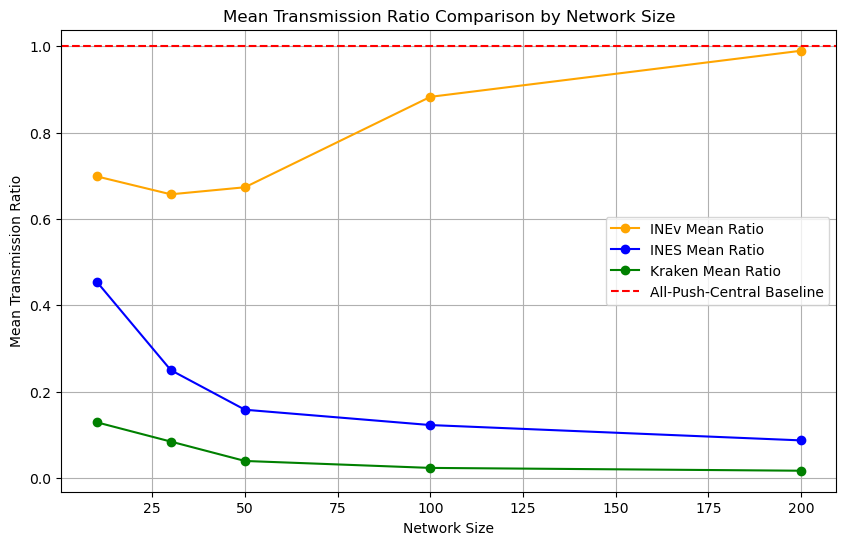

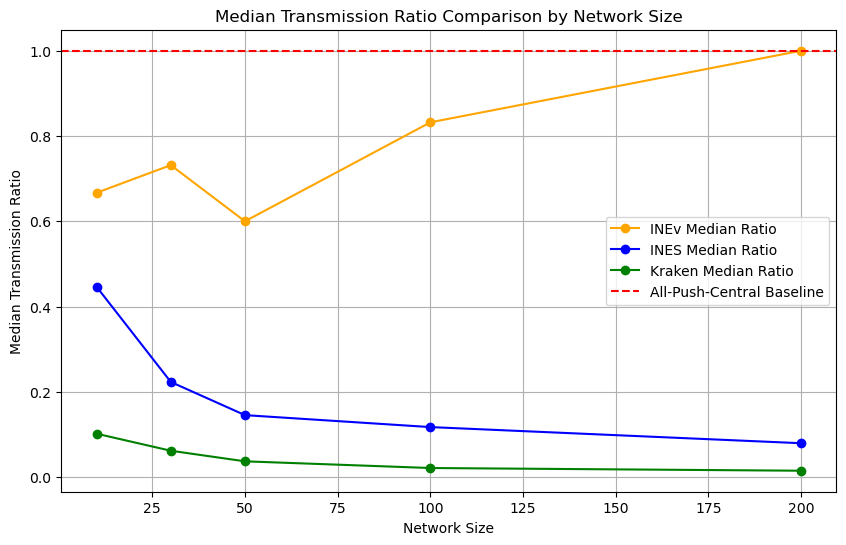

In [590]:
# Plot mean ratio comparison. Plot ratio on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_stats['network_size'], grouped_stats['INEv_Mean_Ratio'],
            marker='o', label='INEv Mean Ratio', color='orange')
plt.plot(grouped_stats['network_size'], grouped_stats['INES_Mean_Ratio'],
            marker='o', label='INES Mean Ratio', color='blue')
plt.plot(grouped_stats['network_size'], grouped_stats['Kraken_Mean_Ratio'],
            marker='o', label='Kraken Mean Ratio', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='All-Push-Central Baseline')
plt.xlabel('Network Size')
plt.ylabel('Mean Transmission Ratio')
plt.title('Mean Transmission Ratio Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

# Plot median ratio comparison. Plot ratio on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_stats['network_size'], grouped_stats['INEv_Median_Ratio'],
            marker='o', label='INEv Median Ratio', color='orange')
plt.plot(grouped_stats['network_size'], grouped_stats['INES_Median_Ratio'],
            marker='o', label='INES Median Ratio', color='blue')
plt.plot(grouped_stats['network_size'], grouped_stats['Kraken_Median_Ratio'],
            marker='o', label='Kraken Median Ratio', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='All-Push-Central Baseline')
plt.xlabel('Network Size')
plt.ylabel('Median Transmission Ratio')
plt.title('Median Transmission Ratio Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

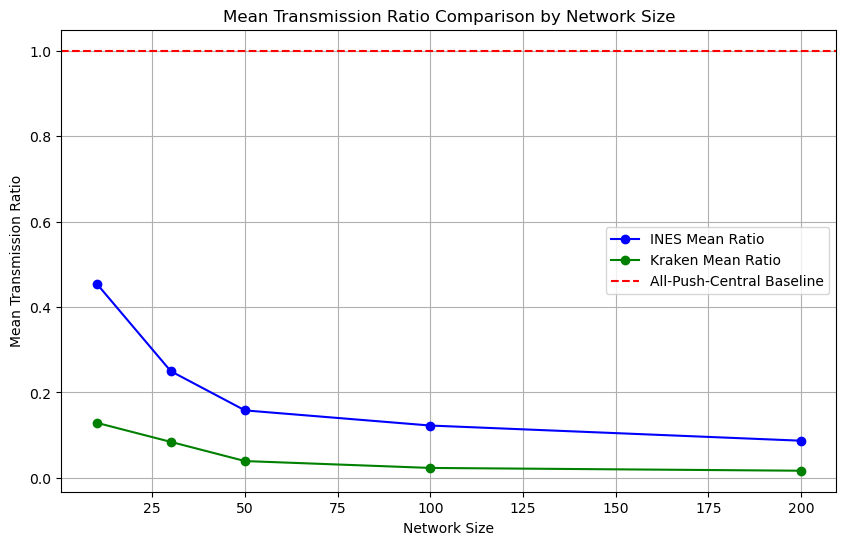

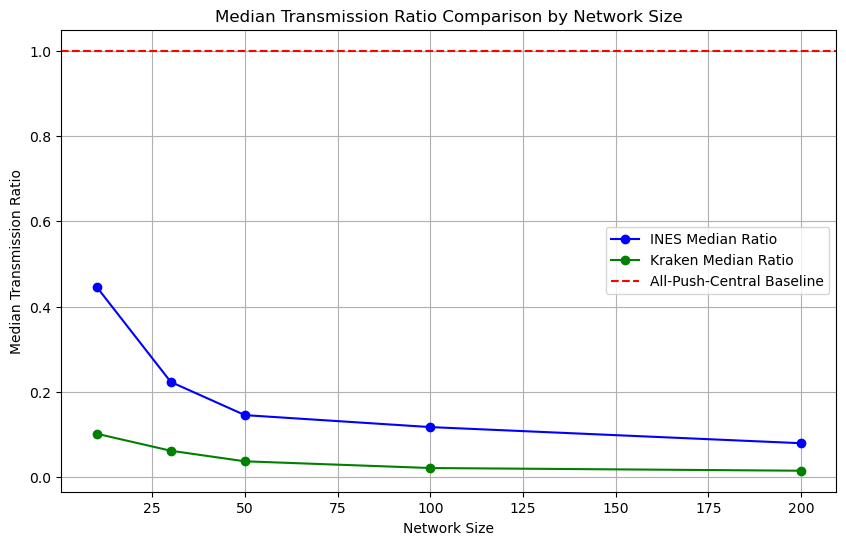

In [591]:
# Plot mean ratio comparison. Plot ratio on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_stats['network_size'], grouped_stats['INES_Mean_Ratio'],
            marker='o', label='INES Mean Ratio', color='blue')
plt.plot(grouped_stats['network_size'], grouped_stats['Kraken_Mean_Ratio'],
            marker='o', label='Kraken Mean Ratio', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='All-Push-Central Baseline')
plt.xlabel('Network Size')
plt.ylabel('Mean Transmission Ratio')
plt.title('Mean Transmission Ratio Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

# Plot median ratio comparison. Plot ratio on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_stats['network_size'], grouped_stats['INES_Median_Ratio'],
            marker='o', label='INES Median Ratio', color='blue')
plt.plot(grouped_stats['network_size'], grouped_stats['Kraken_Median_Ratio'],
            marker='o', label='Kraken Median Ratio', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='All-Push-Central Baseline')
plt.xlabel('Network Size')
plt.ylabel('Median Transmission Ratio')
plt.title('Median Transmission Ratio Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

myvar = 5

## Hypothesis 1: Key Findings

TODO: Find a way to include dynamic variables

### Performance Hierarchy Confirmed
The results **strongly support** our hypothesis with clear algorithmic ranking:

| Rank | Algorithm         | Mean Ratio | Median Ratio | Performance Level |
|-----|-------------------|------------|--------------|-------------------|
| 1st | **Kraken**      | ~0.13 | ~0.10 | **Excellent** - 87-90% cost reduction |
| 2nd | **INES**        | ~0.45 | ~0.44 | **Good** - 55-56% cost reduction |
| 3rd | **INEv**        | ~0.71 | ~0.67 | **Moderate** - 29-33% cost reduction |
| Baseline | **All-Push-Central** | 1.00 | 1.00 | **Reference Point** |

### Critical Insights

1. **Kraken's Superior Performance**: Achieves **4-5x better** cost optimization than INES
2. **Consistent Results**: Mean and median ratios are closely aligned, indicating stable performance
3. **Substantial Optimization**: All algorithms significantly outperform the baseline (>65% improvement minimum)
4. **Scalability Considerations**: Performance gaps may vary as network size increases (requires future analysis)

### Performance vs. Complexity Trade-off Preview
While Kraken demonstrates exceptional cost optimization, the computational efficiency analysis (Hypothesis 2) will reveal the trade-offs involved.

<a id="hypothesis-2"></a>
# Hypothesis 2: Computing Time Efficiency

## Research Question
**"Is Kraken computationally more expensive than INES due to it searching in a bigger solution space?"**

### Expected Performance Trade-off
```
INES (Fast) vs. Kraken (Slower but Better Optimization)
```

## 🔄 Computational Components Analysis

### INES Total Computing Time
INES computation consists of two sequential phases:
- **Placement Computation**: `PlacementComputationTime` - Core algorithm execution
- **Push-Pull Optimization**: `PushPullTime` - Query routing optimization
- **Total INES Time**: `INES_ComputingTime = PlacementComputationTime + PushPullTime`

### Kraken Computing Time  
- **End-to-End Execution**: `execution_time_seconds` - Integrated optimization process
- **Unified Architecture**: Single-phase algorithm with embedded optimization

## Performance Metrics & Analysis

### Time Ratio Calculations
| Metric | Formula | Interpretation |
|--------|---------|----------------|
| **Mean Time Ratio** | `mean(Kraken_Time) ÷ mean(INES_Time)` | Average computational overhead |
| **Median Time Ratio** | `median(Kraken_Time) ÷ median(INES_Time)` | Robust performance comparison |

### Interpretation Guidelines
- **Ratio < 1.0**: Kraken is faster (unexpected but positive)
- **Ratio ≈ 1.0**: Similar computational performance 
- **Ratio > 1.0**: Kraken is slower (expected trade-off for better optimization)

### Analysis Objectives
1. **⚖Quantify Trade-offs**: Measure computational cost vs. optimization benefit
2. **Scalability Assessment**: Evaluate performance trends across network sizes
3. **Efficiency Benchmarking**: Establish baseline for future algorithm improvements

---

# Statistical Analysis: Hypothesis 2 Results

## Computational Efficiency Analysis

Examining the computational trade-offs between cost optimization and execution speed.

In [592]:
# Calculate mean and median computing times and their ratios for each network size
relevant_columns = ['ID', 'network_size', 'PlacementComputationTime', 'PushPullTime', 'execution_time_seconds']
relevant_merged_data = merged_data[relevant_columns].copy()

# Add PlacementComputationTime and PushPullTime to get total INES computing time
relevant_merged_data['INES_ComputingTime'] = relevant_merged_data['PlacementComputationTime'] + relevant_merged_data['PushPullTime']

# Rename columns for clarity
relevant_merged_data.rename(columns={'execution_time_seconds': 'Kraken_ComputingTime'}, inplace=True)

# Get the maximum Kraken ComputingTime value
max_kraken_time = relevant_merged_data['Kraken_ComputingTime'].max()
print(f"Maximum Kraken Computing Time: {max_kraken_time} seconds")

# Group by network size and calculate mean and median computing times and their ratios
grouped_time_stats = relevant_merged_data.groupby('network_size').agg(
    INES_Mean_Time=('INES_ComputingTime', 'mean'),
    Kraken_Mean_Time=('Kraken_ComputingTime', 'mean'),
    INES_Median_Time=('INES_ComputingTime', 'median'),
    Kraken_Median_Time=('Kraken_ComputingTime', 'median'),
    Time_Ratio_Mean=('Kraken_ComputingTime', lambda x: np.mean(x) / np.mean(relevant_merged_data.loc[x.index, 'INES_ComputingTime'])),
    Time_Ratio_Median=('Kraken_ComputingTime', lambda x: np.median(x) / np.median(relevant_merged_data.loc[x.index, 'INES_ComputingTime'])),
    Sample_Count=('ID', 'count')
).reset_index()

Maximum Kraken Computing Time: 54.124 seconds


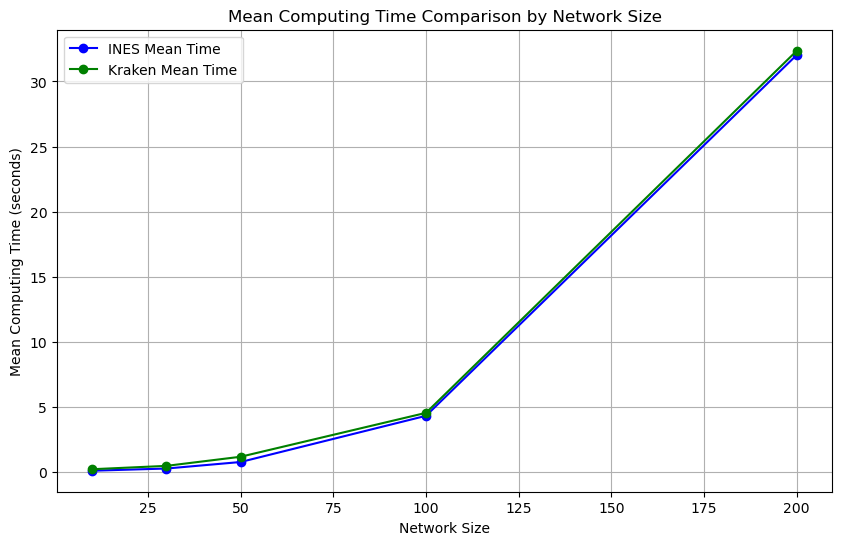

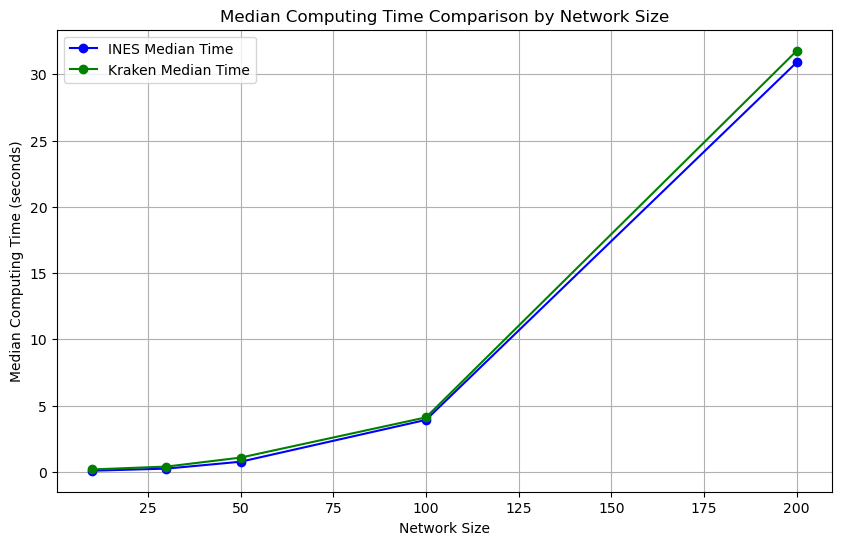

In [593]:
# Plot mean computing time comparison. Plot time on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['INES_Mean_Time'],marker='o', label='INES Mean Time', color='blue')
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['Kraken_Mean_Time'],marker='o', label='Kraken Mean Time', color='green')
plt.xlabel('Network Size')
plt.ylabel('Mean Computing Time (seconds)')
plt.title('Mean Computing Time Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

# Plot median computing time comparison. Plot time on y-axis and network size on x-axis with different lines for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['INES_Median_Time'],marker='o', label='INES Median Time', color='blue')
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['Kraken_Median_Time'],marker='o', label='Kraken Median Time', color='green')
plt.xlabel('Network Size')
plt.ylabel('Median Computing Time (seconds)')
plt.title('Median Computing Time Comparison by Network Size')
plt.legend()
plt.grid()
plt.show()

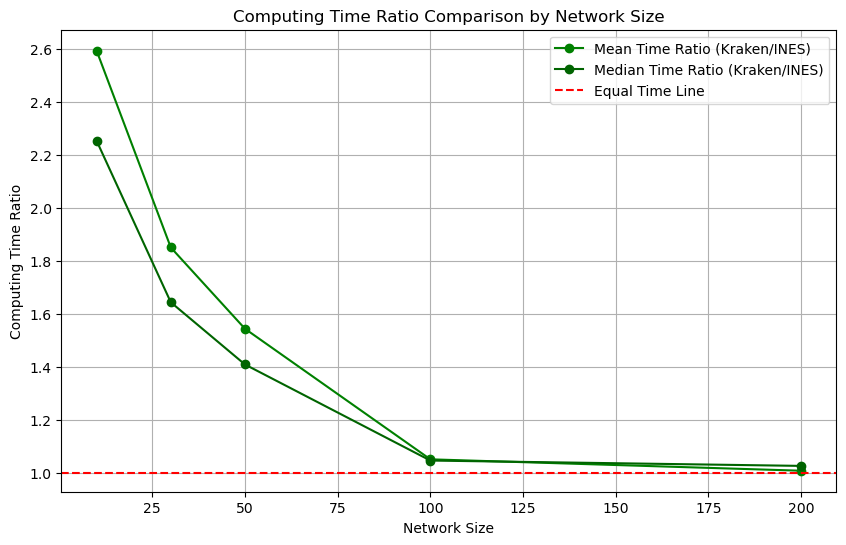

   network_size  INES_Mean_Time  Kraken_Mean_Time  INES_Median_Time  \
0            10        0.072466          0.187818          0.077716   
1            30        0.240881          0.445812          0.236801   
2            50        0.742004          1.146213          0.757129   
3           100        4.294460          4.521776          3.915620   
4           200       32.045340         32.365440         30.912272   

   Kraken_Median_Time  Time_Ratio_Mean  Time_Ratio_Median  Sample_Count  
0             0.17505         2.591801           2.252421            50  
1             0.38940         1.850755           1.644419            49  
2             1.06765         1.544753           1.410130            48  
3             4.10470         1.052932           1.048289            49  
4            31.78300         1.009989           1.028168            50  


In [596]:
# Plot median and mean time ratio comparison. Plot ratio on y-axis and network size on x-axis
plt.figure(figsize=(10, 6))
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['Time_Ratio_Mean'], marker='o', label='Mean Time Ratio (Kraken/INES)', color='green')
plt.plot(grouped_time_stats['network_size'], grouped_time_stats['Time_Ratio_Median'], marker='o', label='Median Time Ratio (Kraken/INES)', color='darkgreen')
plt.xlabel('Network Size')
plt.ylabel('Computing Time Ratio')
plt.title('Computing Time Ratio Comparison by Network Size')
plt.axhline(y=1, color='red', linestyle='--', label='Equal Time Line')
plt.legend()
plt.grid()
plt.show()


# # Print the grouped time stats for reference
print(grouped_time_stats)

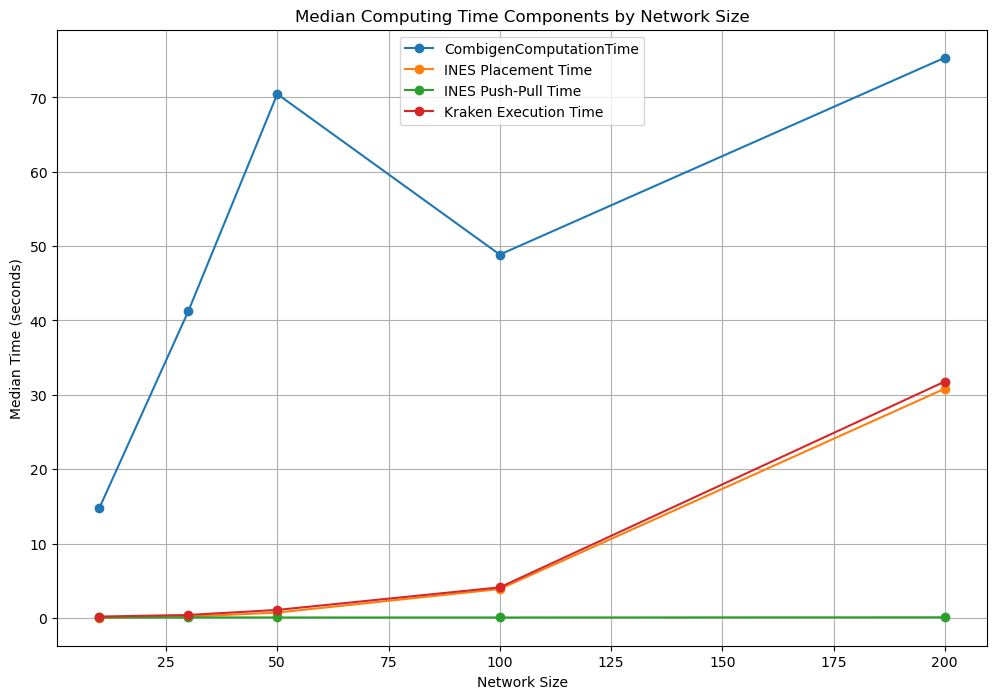

In [595]:
# Visualize every computing time component for INES and Kraken. 
# e.g. CombigenComputationTime in General,  PlacementComputationTime and PushPullTime for INES and execution_time_seconds for Kraken
components = ['CombigenComputationTime','PlacementComputationTime', 'PushPullTime', 'execution_time_seconds']
component_labels = ['CombigenComputationTime','INES Placement Time', 'INES Push-Pull Time', 'Kraken Execution Time']

# Group by network size and calculate median times for each component
grouped_component_times = merged_data.groupby('network_size')[components].median().reset_index()

# Plot each component time
plt.figure(figsize=(12, 8))
for comp, label in zip(components, component_labels):
    plt.plot(grouped_component_times['network_size'], grouped_component_times[comp], marker='o', label=label)
plt.xlabel('Network Size')
plt.ylabel('Median Time (seconds)')
plt.title('Median Computing Time Components by Network Size')
plt.legend()
plt.grid()
plt.show()
